# VGG16 – Convolutional Network for Classification and Detection

- Importing library

In [24]:
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd

As we are using VGG16 architecture, it expects the size of 224 by 224. We will set image size.

In [25]:
image_size = [224, 224]

In [26]:
vgg = VGG16(input_shape = image_size + [3], weights = 'imagenet', include_top =  False)

The first argument is the shape of input image plus **3**(as image is colured[RBG], for black_and_white add **1**).
The second one is the weights eqaul to imagenet. And,
as we know it gives 1000 outputs. Third one excludes the top layer.

In [27]:
for layer in vgg.layers:
    layer.trainable = False

Some of the layers of VGG16 are already trained. To train them again is not a good practice. Thereby making it False

In [28]:
from glob import glob
folders = glob('/kaggle/input/tomato/New Plant Diseases Dataset(Augmented)/train/*')

In [29]:
folders

['/kaggle/input/tomato/New Plant Diseases Dataset(Augmented)/train/Tomato___Late_blight',
 '/kaggle/input/tomato/New Plant Diseases Dataset(Augmented)/train/Tomato___healthy',
 '/kaggle/input/tomato/New Plant Diseases Dataset(Augmented)/train/Tomato___Early_blight',
 '/kaggle/input/tomato/New Plant Diseases Dataset(Augmented)/train/Tomato___Septoria_leaf_spot',
 '/kaggle/input/tomato/New Plant Diseases Dataset(Augmented)/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 '/kaggle/input/tomato/New Plant Diseases Dataset(Augmented)/train/Tomato___Bacterial_spot',
 '/kaggle/input/tomato/New Plant Diseases Dataset(Augmented)/train/Tomato___Target_Spot',
 '/kaggle/input/tomato/New Plant Diseases Dataset(Augmented)/train/Tomato___Tomato_mosaic_virus',
 '/kaggle/input/tomato/New Plant Diseases Dataset(Augmented)/train/Tomato___Leaf_Mold',
 '/kaggle/input/tomato/New Plant Diseases Dataset(Augmented)/train/Tomato___Spider_mites Two-spotted_spider_mite']

Flattening the output layer

In [30]:
x = Flatten()(vgg.output)

In [31]:
prediction = Dense(len(folders), activation = 'softmax')(x)

In [32]:
model = Model(inputs = vgg.input, outputs = prediction)

In [33]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

Compiling the model

In [34]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

Generating more images

In [35]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [36]:
train_data_gen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

In [37]:
test_data_gen = ImageDataGenerator(rescale = 1./255)

In [38]:
train_set = train_data_gen.flow_from_directory('/kaggle/input/tomato/New Plant Diseases Dataset(Augmented)/train/', target_size = (224,224), batch_size = 32, class_mode = 'categorical')

Found 18345 images belonging to 10 classes.


In [39]:
test_set = test_data_gen.flow_from_directory('/kaggle/input/tomato/New Plant Diseases Dataset(Augmented)/valid/', target_size = (224,224), batch_size = 32, class_mode = 'categorical')

Found 4585 images belonging to 10 classes.


Plotting few images 

Text(0.5, 1.0, 'Bacterial Spot')

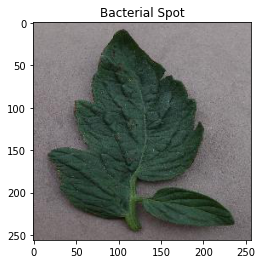

In [40]:
import matplotlib.pyplot as plt
plt.imshow(plt.imread("../input/tomato/New Plant Diseases Dataset(Augmented)/train/Tomato___Bacterial_spot/00416648-be6e-4bd4-bc8d-82f43f8a7240___GCREC_Bact.Sp 3110.JPG"))
plt.title("Bacterial Spot")

Text(0.5, 1.0, 'Early Blight')

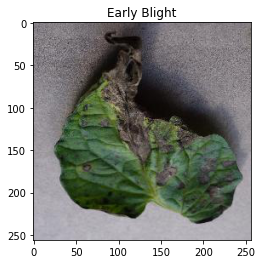

In [41]:
plt.imshow(plt.imread("../input/tomato/New Plant Diseases Dataset(Augmented)/train/Tomato___Early_blight/0034a551-9512-44e5-ba6c-827f85ecc688___RS_Erly.B 9432.JPG"))
plt.title("Early Blight")

Text(0.5, 1.0, 'Late Blight')

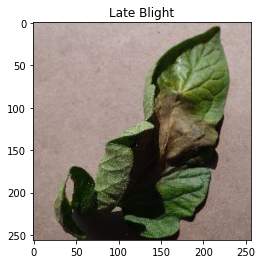

In [42]:
plt.imshow(plt.imread("../input/tomato/New Plant Diseases Dataset(Augmented)/train/Tomato___Late_blight/0003faa8-4b27-4c65-bf42-6d9e352ca1a5___RS_Late.B 4946.JPG"))
plt.title("Late Blight")

Fitting the model

In [43]:
mod = model.fit_generator(
  train_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(train_set),
  validation_steps=len(test_set)
)

Epoch 1/20
574/574 [==============================] - 223s 387ms/step - loss: 0.7288 - accuracy: 0.7585 - val_loss: 0.3691 - val_accuracy: 0.8792
Epoch 2/20
574/574 [==============================] - 224s 390ms/step - loss: 0.4301 - accuracy: 0.8554 - val_loss: 0.3291 - val_accuracy: 0.8879
Epoch 3/20
574/574 [==============================] - 221s 385ms/step - loss: 0.3494 - accuracy: 0.8802 - val_loss: 0.3985 - val_accuracy: 0.8742
Epoch 4/20
574/574 [==============================] - 222s 387ms/step - loss: 0.2766 - accuracy: 0.9071 - val_loss: 0.3092 - val_accuracy: 0.8999
Epoch 5/20
574/574 [==============================] - 223s 389ms/step - loss: 0.2730 - accuracy: 0.9081 - val_loss: 0.4929 - val_accuracy: 0.8619
Epoch 6/20
574/574 [==============================] - 223s 389ms/step - loss: 0.2496 - accuracy: 0.9156 - val_loss: 0.7225 - val_accuracy: 0.8153
Epoch 7/20
574/574 [==============================] - 223s 388ms/step - loss: 0.2374 - accuracy: 0.9238 - val_loss: 0.2812 -

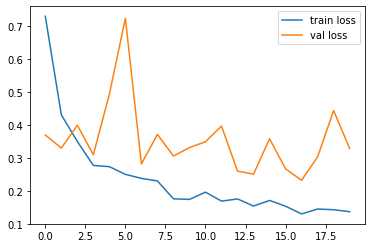

In [44]:
import matplotlib.pyplot as plt
plt.plot(mod.history['loss'], label='train loss')
plt.plot(mod.history['val_loss'], label='val loss')
plt.legend()
plt.show()

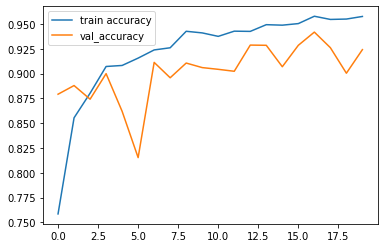

In [45]:
plt.plot(mod.history['accuracy'], label='train accuracy')
plt.plot(mod.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

In [46]:
# save it as a h5 file
from tensorflow.keras.models import load_model
model.save('model.h5')